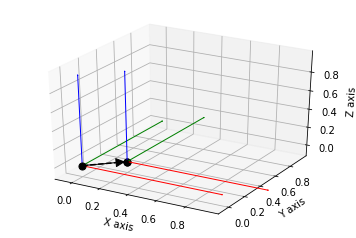

In [2]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm"""

import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
from matplotlib import pyplot as plt
import numpy as np
import drawRobotics as dR

# pyplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# pepper_frame
effector   = "LArm"
frame      = motion.FRAME_TORSO
axisMask   = almath.AXIS_MASK_VEL # just control position
useSensorValues = False # Sensor의 좌표값을 이용하여 좌표를 구할것 구할것인지(?)

path = []
p_init = np.array([[1, 0, 0, 0], 
                     [0, 1, 0, 0],
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])
currentTf = []
for i in range (0,4):
    for j in range (0,4):
        currentTf.append(p_init[i][j])

        
targetTf  = almath.Transform(currentTf) # almath의 transform matrix로 변환
targetTf.r1_c4 += 0.2 
targetTf.r2_c4 += 0.2 # x 에 대해 3cm 이동, y 에 대해 3cm 이동

p_move=[]
moveTf=[]
Tf_list=list(targetTf.toVector())

for i in range (0,4):
    for j in range (0,4):
        moveTf.append((Tf_list[(4*i)+(j)]))
    p_move += [moveTf]
    moveTf=[]
p_moveTf = np.array(p_move)

path.append(list(targetTf.toVector())) # Convert it to a tuple(targetTf.toVector) -> list
path.append(currentTf)

# Go to the target and back again
times      = [2.0, 4.0] # seconds

# Moves end-effector to the given transforms over time. This is a blocking call.
# motion_service.transformInterpolations(effector, frame, path, axisMask, times)


dR.drawPointWithAxis(ax, p_init)
dR.drawVector(ax, p_init, p_moveTf, arrowstyle='-|>')
dR.drawPointWithAxis(ax, p_moveTf)


ax.set_xlim([-0.1,1]), ax.set_ylim([-0.1,1]), ax.set_zlim([-0.1,1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()


In [ ]:
p_move

In [ ]:
moveTf

In [ ]:
p_init = np.array([[1, 0, 0, 0], 
                     [0, 1, 0, 0],
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])
currentTf = []
for i in range (0,4):
    for j in range (0,4):
        currentTf.append(p_init[i][j])
currentTf

In [ ]:
from matplotlib import pyplot as plt
import drawRobotics as dR
import numpy as np

P_atA = np.array([2.2,2.2,1.5])

AORG = np.array([0,0,0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dR.drawVector(ax, AORG, P_atA, arrowstyle='-|>')


ax.set_xlim([-0.1,2.5]), ax.set_ylim([-0.1,2.5]), ax.set_zlim([-0.1,2.5])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

In [ ]:
path.append(list(targetTf.toVector())) # Convert it to a tuple(targetTf.toVector) -> list
path.append(currentTf)

path


In [10]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm and Torso"""

import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
from matplotlib import pyplot as plt
import numpy as np
import drawRobotics as dR

# pyplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

frame      = motion.FRAME_WORLD
coef       = 0.5                   # motion speed
times      = [coef, 2.0*coef, 3.0*coef, 4.0*coef]
useSensorValues = False

# Relative movement between current and desired positions
dy         = + 0.03                 # translation axis Y (meters)
dz         = - 0.03                 # translation axis Z (meters)
dwx        = + 8.0 * almath.TO_RAD   # rotation axis X (radians)

# Motion of Torso with _async process
effector   = "Torso"

path = []


p_init = np.array([[1, 0, 0, 0],  #  initTf = almath.Transform(motion_service.getTransform(effector, frame, useSensorValues))
                     [0, 1, 0, 0],
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])
currentTf = []
for i in range (0,4):
    for j in range (0,4):
        currentTf.append(p_init[i][j])

        
    
# point 1
p_move = []
moveTf=[]
deltaTf  = almath.Transform(0.0, -dy, dz)*almath.Transform().fromRotX(-dwx)
deltaTf_vec = list(deltaTf.toVector())

for i in range (0,4):
    for j in range (0,4):
        moveTf.append((deltaTf_vec[(4*i)+(j)]))
    p_move += [moveTf]
    moveTf=[]
p_moveTf = np.array(p_move)
targetTf = np.dot(p_init, p_moveTf))



# point 2
path.append(list(initTf.toVector()))

# point 3
deltaTf  = almath.Transform(0.0, dy, dz)*almath.Transform().fromRotX(dwx)
targetTf = initTf*deltaTf
path.append(list(targetTf.toVector()))

# point 4
path.append(list(initTf.toVector()))

axisMask   = almath.AXIS_MASK_ALL  # control all the effector axes
motion_service.transformInterpolations(effector, frame, path,
                                           axisMask, times, _async=True)

# Motion of Arms with block process
frame     = motion.FRAME_TORSO
axisMask  = almath.AXIS_MASK_VEL  # control just the position
times     = [1.0*coef, 2.0*coef]  # seconds

# Motion of Right Arm during the first half of the Torso motion
effector  = "RArm"

path = []
currentTf = motion_service.getTransform(effector, frame, useSensorValues)
targetTf  = almath.Transform(currentTf)
targetTf.r2_c4 -= 0.04 # y
path.append(list(targetTf.toVector()))
path.append(currentTf)

motion_service.transformInterpolations(effector, frame, path, axisMask, times)

# Motion of Left Arm during the last half of the Torso motion
effector   = "LArm"

path = []
currentTf = motion_service.getTransform(effector, frame, useSensorValues)
targetTf  = almath.Transform(currentTf)
targetTf.r2_c4 += 0.04 # y
path.append(list(targetTf.toVector()))
path.append(currentTf)

motion_service.transformInterpolations(effector, frame, path, axisMask, times)

# Go to rest position
motion_service.rest()



IndentationError: unexpected indent (<ipython-input-10-e06f592c247c>, line 49)

In [22]:
# Relative movement between current and desired positions
dy         = + 0.03                 # translation axis Y (meters)
dz         = - 0.03                 # translation axis Z (meters)
dwx        = + 8.0 * almath.TO_RAD   # rotation axis X (radians)

deltaTf  = almath.Transform(0.0, -dy, dz)*almath.Transform().fromRotX(-dwx)

print(list(deltaTf.toVector()))

[1.0, 0.0, 0.0, 0.0, 0.0, 0.9902680516242981, 0.13917310535907745, -0.029999999329447746, 0.0, -0.13917310535907745, 0.9902680516242981, -0.029999999329447746, 0.0, 0.0, 0.0, 1.0]


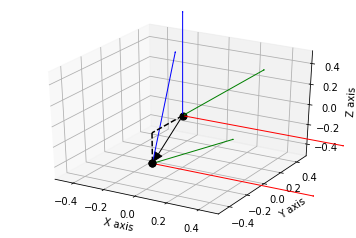

In [67]:
#! /usr/bin/env python
# -*- encoding: UTF-8 -*-

"""Example: Use transformInterpolations Method on Arm and Torso"""

import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
from matplotlib import pyplot as plt
import numpy as np
import drawRobotics as dR

# pyplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

frame      = motion.FRAME_WORLD
coef       = 0.5                   # motion speed
times      = [coef, 2.0*coef, 3.0*coef, 4.0*coef]
useSensorValues = False

# Relative movement between current and desired positions
dy         = + 0.33                 # translation axis Y (meters)
dz         = - 0.3                 # translation axis Z (meters)
dwx        = + 15.0 * almath.TO_RAD   # rotation axis X (radians)

# Motion of Torso with _async process
effector   = "Torso"

path = []


p_init = np.array([[1, 0, 0, 0],  #  initTf = almath.Transform(motion_service.getTransform(effector, frame, useSensorValues))
                     [0, 1, 0, 0],
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])
currentTf = []
for i in range (0,4):
    for j in range (0,4):
        currentTf.append(p_init[i][j])

        
    
# point 1
p_move = []
moveTf=[]
deltaTf  = almath.Transform(0.0, -dy, dz)*almath.Transform().fromRotX(-dwx)
deltaTf_vec = list(deltaTf.toVector())

for i in range (0,4):
    for j in range (0,4):
        moveTf.append((deltaTf_vec[(4*i)+(j)]))
    p_move += [moveTf]
    moveTf=[]
p_moveTf = np.array(p_move)
targetTf = np.dot(p_init, p_moveTf)



dR.drawPointWithAxis(ax, p_init)
dR.drawVector(ax, p_init, targetTf, arrowstyle='-|>')
dR.drawPointWithAxis(ax, targetTf)


ax.set_xlim([-0.5,0.5]), ax.set_ylim([-0.5,0.5]), ax.set_zlim([-0.5,0.5])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()



In [60]:
targetTf

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.99026805,  0.13917311, -0.03      ],
       [ 0.        , -0.13917311,  0.99026805, -0.03      ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.99026805,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.99026805, -0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])